In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from torchvision import transforms
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import Callback
import time
from tensorflow.keras.datasets import cifar10

In [2]:
def plot_accuracy(history):
    plt.figure(figsize=(5, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_loss(history):
    plt.figure(figsize=(5, 5))
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

class AccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}/{self.params['epochs']}")
        print(f"Training - loss: {logs['loss']:.4f}, accuracy: {logs['accuracy']*100:.4f}%")
        print(f"Validation - loss: {logs['val_loss']:.4f}, accuracy: {logs['val_accuracy']*100:.4f}%")


# Data preparation and preprocessing

In [4]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, y_train = shuffle(X_train, y_train)

num_samples = len(X_test)
indices = np.arange(num_samples)
np.random.shuffle(indices)

x_test_shuffled = X_test[indices]
y_test_shuffled = y_test[indices]

# Split the data into test and validation sets
split = num_samples // 2
X_validation, X_test = x_test_shuffled[:split], x_test_shuffled[split:]
y_validation, y_test = y_test_shuffled[:split], y_test_shuffled[split:]


# Split the dataset into initial to be used as training data
initial_set_size = int(0.2 * len(X_train))
initial_set = X_train[:initial_set_size]
initial_labels = y_train[:initial_set_size]


subset_size = int(1 * len(initial_set))
subset_indices = np.random.choice(len(initial_set), size=subset_size, replace=False)
subset = initial_set[subset_indices]
subset_labels = initial_labels[subset_indices]

datagen_augmented = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    zoom_range=0.3,
    fill_mode='nearest'
)

augmented_subset = []
augmented_subset_labels = []
for image, label in zip(subset, subset_labels):
    image = np.expand_dims(image, axis=0)
    augmented_images = datagen_augmented.flow(image, batch_size=1)
    augmented_images = [next(augmented_images)[0] for _ in range(2)]
    augmented_subset.extend(augmented_images)
    augmented_subset_labels.extend([label] * 2)

# Concatenating augmented image set with the inital_set
final_set = np.concatenate((initial_set, augmented_subset), axis=0)
final_labels = np.concatenate((initial_labels, augmented_subset_labels), axis=0)

X_train = final_set
y_train = final_labels
X_train = (X_train / 255.0)
X_test = (X_test / 255.0)
X_validation = (X_validation / 255.0)
X_train, y_train = shuffle(X_train, y_train)

# Prepared training, testing and validation sets
print("X_train:", final_set.shape)
print("y_train:", final_labels.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train: (75000, 32, 32, 3)
y_train: (75000, 1)
X_validation shape: (5000, 32, 32, 3)
y_validation shape: (5000, 1)
X_test shape: (5000, 32, 32, 3)
y_test shape: (5000, 1)


# MLP architecture and plots

Epoch 1/5
Training - loss: 2.0896, accuracy: 22.4500%
Validation - loss: 1.9607, accuracy: 28.9200%
Epoch 2/5
Training - loss: 2.0039, accuracy: 26.3900%
Validation - loss: 1.9108, accuracy: 30.8200%
Epoch 3/5
Training - loss: 1.9741, accuracy: 28.1000%
Validation - loss: 1.8561, accuracy: 34.0600%
Epoch 4/5
Training - loss: 1.9484, accuracy: 29.0233%
Validation - loss: 1.8632, accuracy: 33.4400%
Epoch 5/5
Training - loss: 1.9333, accuracy: 29.6567%
Validation - loss: 1.8739, accuracy: 32.0600%
Testing - loss: 1.8785, accuracy: 31.3400%
Total execution time: 22.21495294570923 seconds


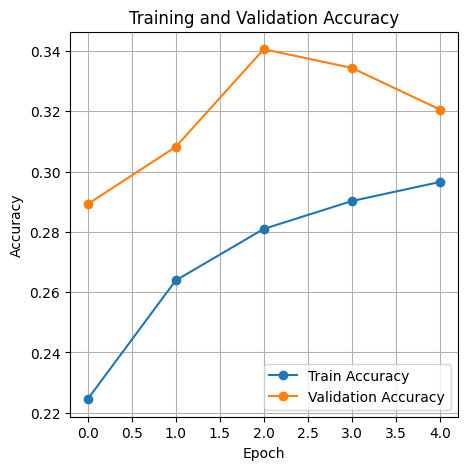

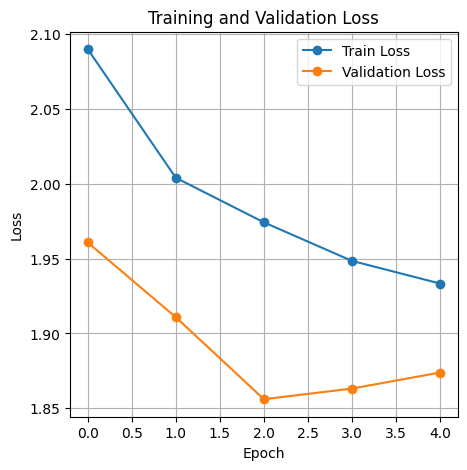

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(512, activation='sigmoid'),
        layers.Dense(512, activation='sigmoid'),
        layers.Dense(10, activation='softmax')
    ])

start_time = time.time()

ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = ann.fit(X_train, y_train, batch_size=32, validation_data=(X_validation, y_validation), epochs=5, callbacks=[AccuracyCallback()], verbose=0)

end_time = time.time()
total_time = end_time - start_time

test_loss, test_accuracy = ann.evaluate(X_test, y_test, verbose=0)
print(f"Testing - loss: {test_loss:.4f}, accuracy: {test_accuracy*100:.4f}%")
print("Total execution time:", total_time, "seconds")

plot_accuracy(history)
plot_loss(history)

# CNN1 architecture and plots

Epoch 1/5
Training - loss: 1.8378, accuracy: 32.2233%
Validation - loss: 1.4931, accuracy: 46.2400%
Epoch 2/5
Training - loss: 1.5308, accuracy: 44.9567%
Validation - loss: 1.3485, accuracy: 51.9200%
Epoch 3/5
Training - loss: 1.2481, accuracy: 55.7667%
Validation - loss: 1.2844, accuracy: 54.3000%
Epoch 4/5
Training - loss: 0.8354, accuracy: 70.8900%
Validation - loss: 1.5030, accuracy: 52.7600%
Epoch 5/5
Training - loss: 0.3825, accuracy: 87.6733%
Validation - loss: 1.8725, accuracy: 52.0600%
Testing - loss: 1.9621, accuracy: 52.3400%
Total execution time: 83.2709596157074 seconds


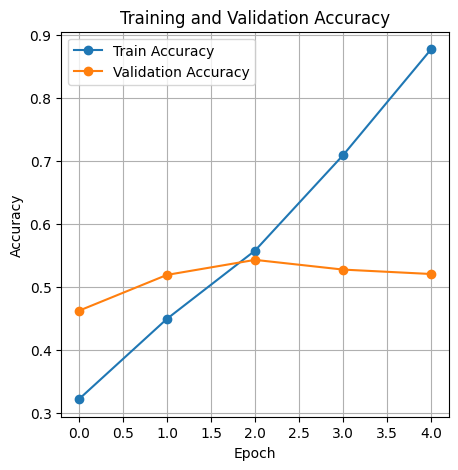

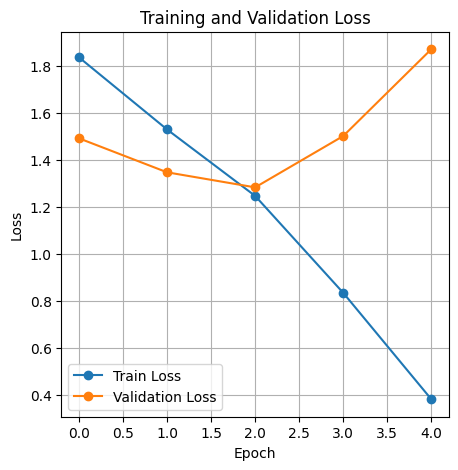

In [ ]:
cnn1 = models.Sequential()

cnn1.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)))
cnn1.add(Conv2D(64, (3, 3), activation='relu'))
cnn1.add(Flatten())
cnn1.add(Dense(512, activation='sigmoid'))
cnn1.add(Dense(512, activation='sigmoid'))
cnn1.add(Dense(10, activation='softmax'))
cnn1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history = cnn1.fit(X_train, y_train, batch_size=32, validation_data=(X_validation, y_validation), epochs=5, callbacks=[AccuracyCallback()], verbose=0)

end_time = time.time()
total_time = end_time - start_time

test_loss, test_accuracy = cnn1.evaluate(X_test, y_test, verbose=0)
print(f"Testing - loss: {test_loss:.4f}, accuracy: {test_accuracy*100:.4f}%")
print("Total execution time:", total_time, "seconds")

plot_accuracy(history)
plot_loss(history)

# CNN2 Architecture and plots

Epoch 1/5
Training - loss: 1.9460, accuracy: 27.7933%
Validation - loss: 1.5591, accuracy: 44.3400%
Epoch 2/5
Training - loss: 1.6966, accuracy: 37.9933%
Validation - loss: 1.4869, accuracy: 46.9800%
Epoch 3/5
Training - loss: 1.5793, accuracy: 42.4800%
Validation - loss: 1.3200, accuracy: 52.9200%
Epoch 4/5
Training - loss: 1.4857, accuracy: 46.1200%
Validation - loss: 1.3042, accuracy: 52.2200%
Epoch 5/5
Training - loss: 1.3971, accuracy: 49.7600%
Validation - loss: 1.2180, accuracy: 56.6800%
Testing - loss: 1.2164, accuracy: 56.9800%
Total execution time: 42.67939472198486 seconds


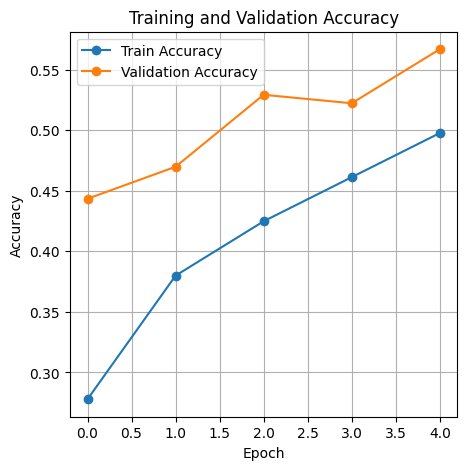

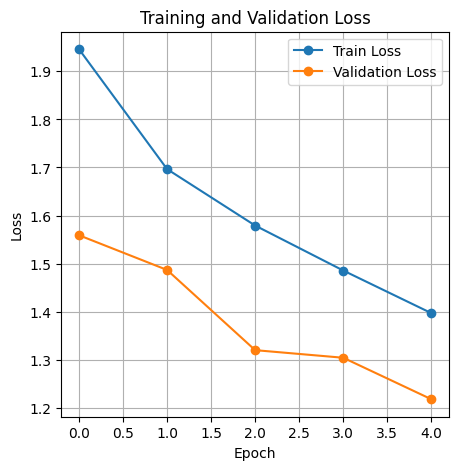

In [ ]:
cnn2 = models.Sequential()

cnn2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Conv2D(64, (3, 3), activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Flatten())
cnn2.add(Dense(512, activation='sigmoid'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(512, activation='sigmoid'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(10, activation='softmax'))
cnn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history = cnn2.fit(X_train, y_train, batch_size=32, validation_data=(X_validation, y_validation), epochs=5, callbacks=[AccuracyCallback()], verbose=0)
end_time = time.time()
total_time = end_time - start_time

test_loss, test_accuracy = cnn2.evaluate(X_test, y_test, verbose=0)
print(f"Testing - loss: {test_loss:.4f}, accuracy: {test_accuracy*100:.4f}%")

print("Total execution time:", total_time, "seconds")

plot_accuracy(history)
plot_loss(history)


# CNN Improved architecture and plots

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 512)       1

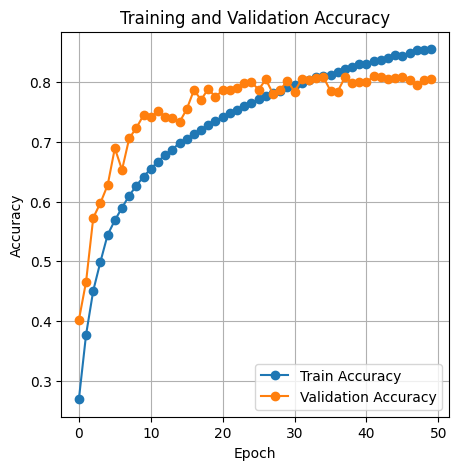

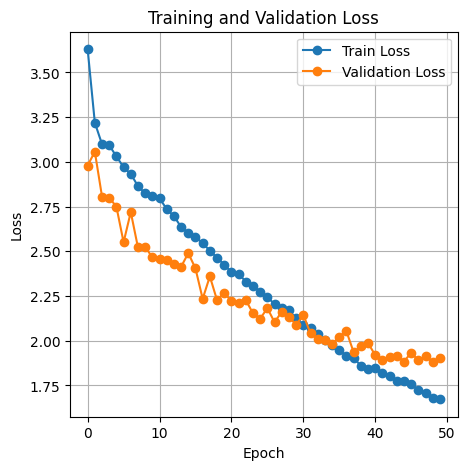

In [5]:
cnn_improved = models.Sequential()

cnn_improved.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3), padding='same'))
cnn_improved.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_improved.add(BatchNormalization())
cnn_improved.add(MaxPooling2D(pool_size=(2, 2)))

cnn_improved.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn_improved.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
cnn_improved.add(BatchNormalization())
cnn_improved.add(MaxPooling2D(pool_size=(2, 2)))

cnn_improved.add(Dropout(0.3))

cnn_improved.add(Flatten())

cnn_improved.add(Dense(512, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
cnn_improved.add(BatchNormalization())
cnn_improved.add(Dropout(0.5))

cnn_improved.add(Dense(256, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
cnn_improved.add(BatchNormalization())
cnn_improved.add(Dropout(0.5))

cnn_improved.add(Dense(128, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
cnn_improved.add(BatchNormalization())
cnn_improved.add(Dropout(0.5))

cnn_improved.add(Dense(10, activation='softmax'))

cnn_improved.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_improved.summary()
start_time = time.time()

history = cnn_improved.fit(X_train, y_train, batch_size=32, validation_data=(X_validation, y_validation), epochs=50, callbacks=[AccuracyCallback()], verbose=0)

end_time = time.time()
total_time = end_time - start_time

test_loss, test_accuracy = cnn_improved.evaluate(X_test, y_test, verbose=0)
print(f"Testing - loss: {test_loss:.4f}, accuracy: {test_accuracy*100:.4f}%")

print("Total execution time:", total_time, "seconds")
